<a href="https://colab.research.google.com/github/Rafagenaro/Automobilismo/blob/main/Automobilismo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Automobile_data.csv')

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
df.shape

(205, 26)

In [ ]:
df.dtypes

,0
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


In [ ]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [ ]:
df['price'].describe()

,price
count,201.000000
mean,13207.129353
std,7947.066342
min,5118.000000
25%,7775.000000
50%,10295.000000
75%,16500.000000
max,45400.000000


25% dos carros custam menos que 7.775

50% centrais custam entre 7.775 e 16.500

25% dos carros custam mais que 16.500

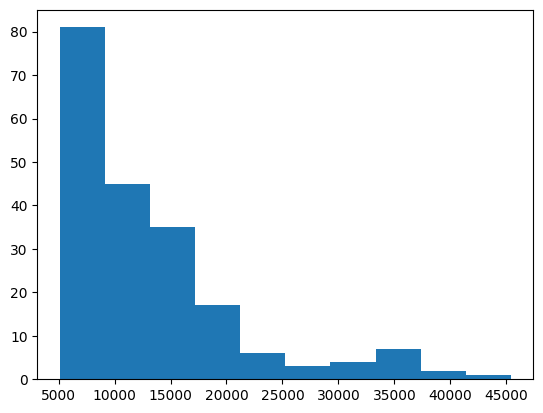

In [ ]:
plt.hist(df['price'])
plt.show()

In [ ]:
df['price'].median()

10295.0

Quando a média é maior que a mediana, isso indica que a distribuição é assimétrica à direita. Nesse caso, há uma concentração maior de valores menores e alguns valores muito altos que puxam a média para cima.

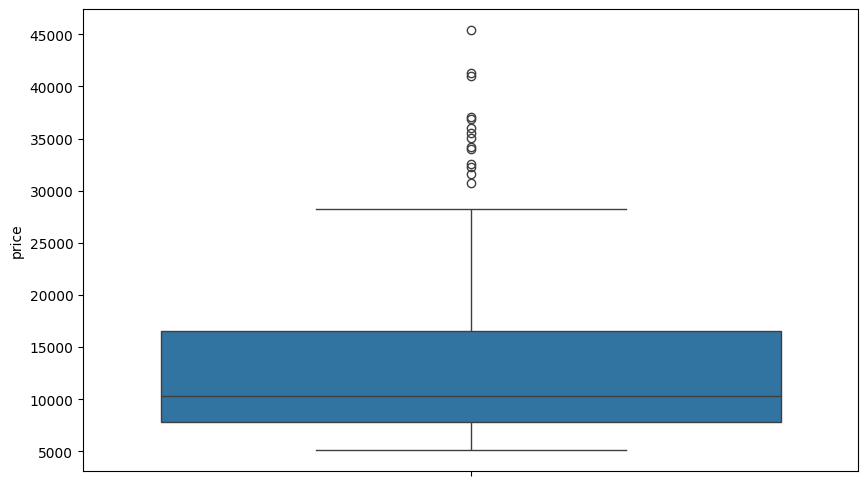

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(y=df['price'])
plt.show()

In [ ]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)

IQR = q3 - q1
IQR

np.float64(8725.0)

O IQR de 8.725 indica que os 50% centrais dos preços estão espalhados em um intervalo de 8.725 unidades monetárias.

In [ ]:
limite_superior = q3 + 1.5 * IQR
limite_superior

np.float64(29587.5)

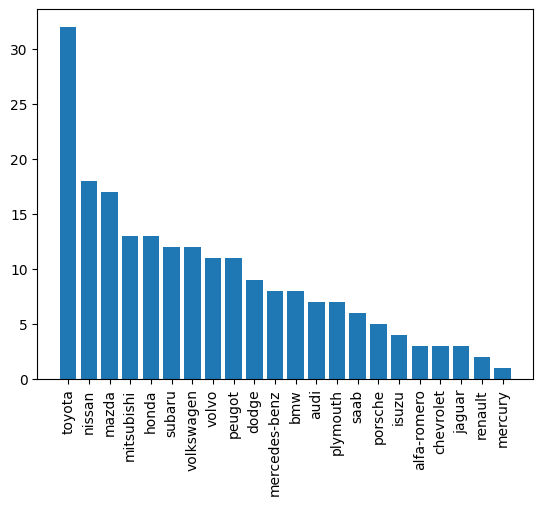

In [ ]:
contagem = df['make'].value_counts()

plt.bar(contagem.index, contagem.values)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['make'].value_counts()

,count
make,
toyota,32
nissan,18
mazda,17
mitsubishi,13
honda,13
subaru,12
volkswagen,12
volvo,11
peugot,11


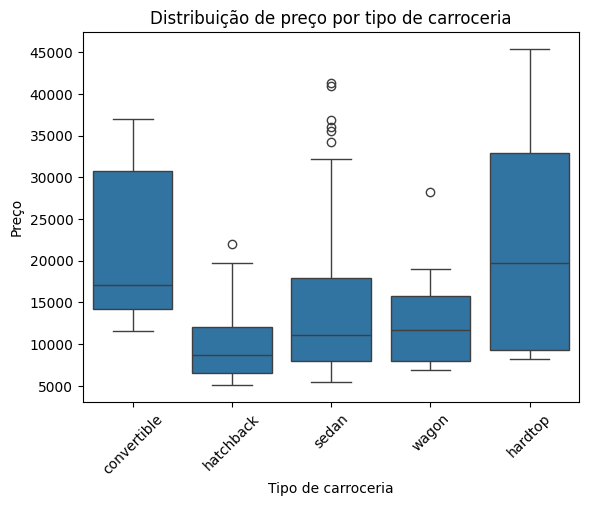

In [ ]:
sns.boxplot(x='body-style', y='price', data=df)
plt.xticks(rotation=45)
plt.ylabel('Preço')
plt.xlabel('Tipo de carroceria')
plt.title('Distribuição de preço por tipo de carroceria')
plt.show()

O boxplot mostrou diferenças claras de preço entre os estilos.

Carros do tipo hardtop e convertible têm preços médios bem mais altos e maior variação, enquanto hatchbacks tendem a ser os mais baratos.

In [ ]:
df.dtypes

,0
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


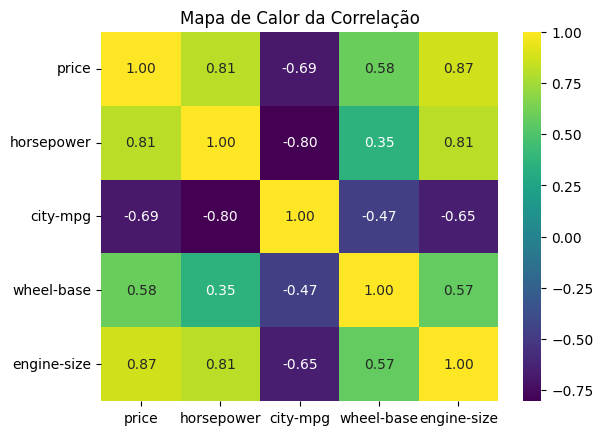

In [ ]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

corr_matrix = df[['price', 'horsepower', 'city-mpg', 'wheel-base', 'engine-size']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Mapa de Calor da Correlação')
plt.show()

price × engine-size (0,87)

Forte correlação positiva: carros com motores maiores tendem a ter preços mais altos.

price × horsepower (0,81)

Forte correlação positiva: carros com mais potência tendem a ser mais caros.

price × city-mpg (-0,69)

Correlação negativa significativa: carros mais caros geralmente têm menor consumo na cidade (mais potentes e menos econômicos).

wheel-base × price (0,58)

Correlação moderada positiva: carros com maior distância entre eixos tendem a ter preço mais alto

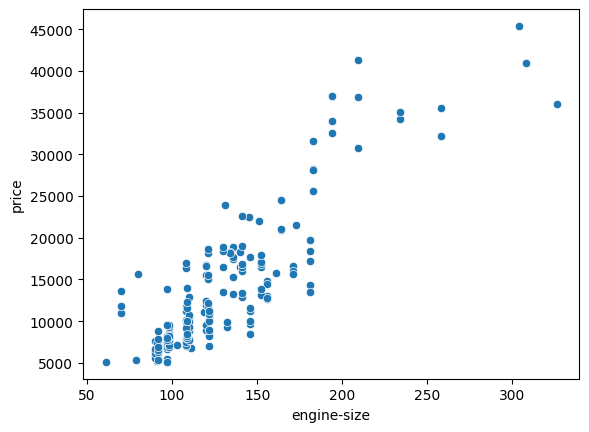

In [ ]:
sns.scatterplot(x='engine-size', y='price', data=df)
plt.show()

Existe uma relação positiva entre engine-size e price: conforme o tamanho do motor aumenta, o preço do carro tende a aumentar.

A tendência é relativamente linear, embora haja alguma dispersão.

Carros com motores muito grandes (acima de 250) têm preços significativamente mais altos, mostrando outliers de preço elevado.